In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [3]:
data = pd.read_csv(r'human-freedom-index-2019.csv')
data

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,8.73,4,1,8.8,7.2,7.2,...,3.7,4.6,9.9,8.6,7.3,8.8,7.1,8.5,8.18,6
1616,2008,DNK,Denmark,Western Europe,8.73,4,1,9.4,7.9,8.7,...,4.7,7.4,9.7,9.4,9.7,8.5,8.2,8.6,7.98,9
1617,2008,CHE,Switzerland,Western Europe,8.83,3,1,-,-,-,...,5.5,7.8,9.3,8.8,8.3,9.3,8.1,8.5,8.35,4
1618,2008,NZL,New Zealand,Oceania,8.94,2,1,8.7,7.6,7.9,...,4.5,4.5,10,9.6,9.8,9.2,7.9,8.8,8.46,3


In [4]:
# Select one year data from the whold dataset
data_2017 = data[data.year==2017]
# data_2016 = data[data.year==2016]
# data_2015 = data[data.year==2015]
# data_2014 = data[data.year==2014]
# data_2013 = data[data.year==2013]
# data_2012 = data[data.year==2012]
# data_2011 = data[data.year==2011]
# data_2010 = data[data.year==2010]
# data_2009 = data[data.year==2009]
# data_2008 = data[data.year==2008]

In [5]:
# data_2017.to_csv('year2017HFI.csv')
# Define a cutoff rate for selecting features roughly.
cutoff = 0.8
col_candidate = []
for col_name in data_2017.columns.values.tolist():
    len_data = data_2017.shape[0]
    col_val = data_2017[col_name]
    cnt = 0
    for val in col_val:
        if val == '-':
            cnt += 1
    if (float(cnt) / len_data) > cutoff:
#         print(col_name)
        col_candidate.append(str(col_name))

data_2017_selected = data_2017.drop(col_candidate, axis=1)
# print(col_candidate)
# data_2017_selected.shape
# select 110 features

In [6]:
hf_score = data_2017_selected['hf_score'].values.astype(np.float32())
print(hf_score.dtype)
data_2017_selected = data_2017_selected.replace('-', 0)
data_2017_selected_features = data_2017_selected[data_2017_selected.columns.values.tolist()[6:]]
data_2017_selected_features

float32


,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,1,6.7,4.5,4.7,5.3,9.1,10,10,10,10,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,4,0,0,0,3.8,9.5,10,9.5,5,9.9,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,4,0,0,0,3.4,8.1,10,9.7,7.5,9.9,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2,7.1,5.8,4.3,5.7,8,5,10,7.5,10,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2,0,0,0,4.9,9,10,10,7.5,10,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,4,1.5,3.3,1.4,2.1,0,10,10,5,9.9,...,1.1,0,3.3,1.5,5,1.1,2,2.5,2.58,162
158,3,5.4,4.4,4.9,4.9,9.4,10,10,10,10,...,3.7,6.4,9.4,3.7,8.2,4.4,6,6.7,6.27,119
159,4,0,0,0,2.4,7.3,0,0,0,1,...,3.1,0,7.5,2.1,0,7.2,4,5,5.84,140
160,3,2.1,4.9,4.2,4.1,7.9,10,10,7.5,10,...,4.4,4,9.4,3.1,7.8,8.2,6.2,6.5,6.84,83


In [7]:
# Correction Analysis
import numpy as np
from scipy.stats import pearsonr

cutoff_corr = 0.6
high_corr = []
low_corr = []
corr_res = []
data_2017_selected_features.columns.values.tolist()
for col_name in data_2017_selected_features.columns.values.tolist():
    col_val = data_2017_selected_features[col_name].values.astype(np.float32())
    pe = pearsonr(hf_score, col_val)
    corr_res.append(pe)
    if pe[0] > cutoff_corr:
        high_corr.append(col_name)
    else:
        low_corr.append(col_name)

print(len(high_corr))
print(len(low_corr))

25
79


In [8]:
# Regression analysis - LogisticRegression
from sklearn.linear_model import LogisticRegression
data_2017_selected_features_withcorr = data_2017_selected_features[high_corr]

x_train = data_2017_selected_features_withcorr.values.astype(np.float32())
y_train = hf_score.astype('int')

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.score(x_train, y_train)

0.8703703703703703

In [9]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
test_start = 130

regr = RandomForestRegressor(max_depth = 3, random_state=0)
regr.fit(x_train[:test_start], y_train[:test_start])
regr.score(x_train[test_start:], y_train[test_start:])

0.8390042573828775

In [10]:
# SVR
from sklearn.svm import SVR
test_start = 130
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(x_train[:test_start], y_train[:test_start])
svr.score(x_train[test_start:], y_train[test_start:])

0.5236462882058261

In [11]:
from sklearn.neural_network import MLPRegressor
test_start = 130
regressor = MLPRegressor(hidden_layer_sizes = (200, 75, 50, 25), activation = 'relu',
                         solver = 'sgd',
                         learning_rate = 'adaptive',
                         random_state = 1)
regressor.fit(x_train[:test_start], y_train[:test_start])
regressor.score(x_train[test_start:], y_train[test_start:])

0.9289977041115187

In [12]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0, n_estimators=150)
ada.fit(x_train[:test_start], y_train[:test_start])
ada.score(x_train[test_start:], y_train[test_start:])


0.9075392466626839

In [14]:
# xgboost regression
import xgboost
import numpy as np
test_start = 130

xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=200,
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb.fit(x_train[:test_start], y_train[:test_start])
xgb.score(x_train[test_start:], y_train[test_start:])
# data_2017_selected_features is the data without NAN values
# it is a feature matrix without headers which means pure feature matrix

0.9047105017025705

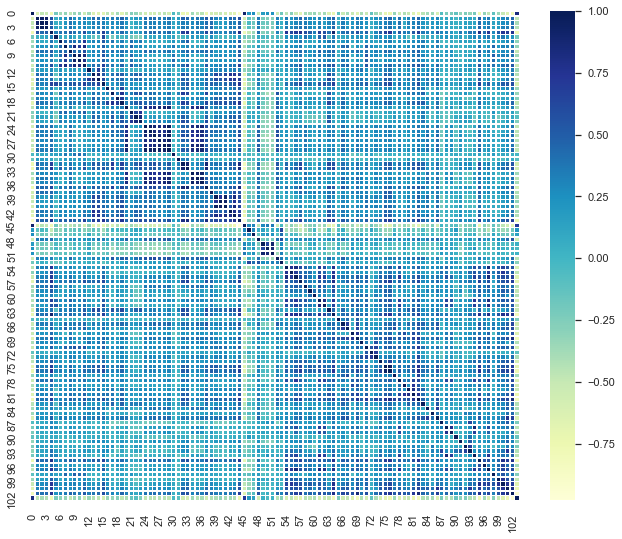

In [16]:
import seaborn as sns

vis_data = data_2017_selected_features.values.astype(np.float32())
corr = pd.DataFrame(vis_data).corr()
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cmap="YlGnBu")

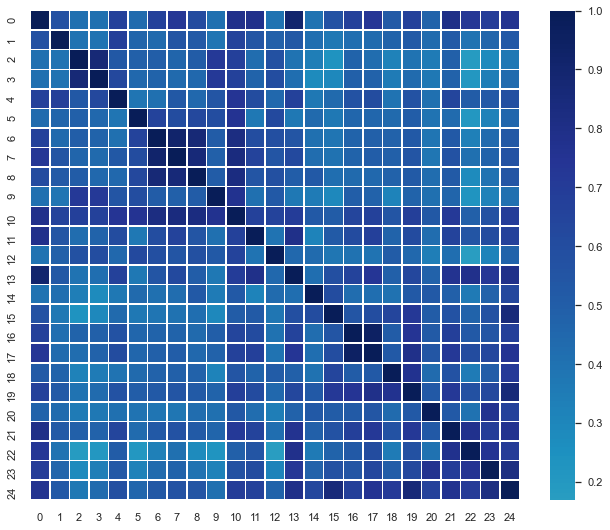

In [17]:
corr = pd.DataFrame(x_train).corr()
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cmap="YlGnBu")

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_2017_selected, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [ ]:
profile.to_widgets()